In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv("Sunspots.csv")
df.rename(columns={"Unnamed: 0":"Number of months"}, inplace=True)
df["Number of months"] = df["Number of months"] + 1
df.head()

,Number of months,Date,Monthly Mean Total Sunspot Number
0,1,1749-01-31,96.7
1,2,1749-02-28,104.3
2,3,1749-03-31,116.7
3,4,1749-04-30,92.8
4,5,1749-05-31,141.7


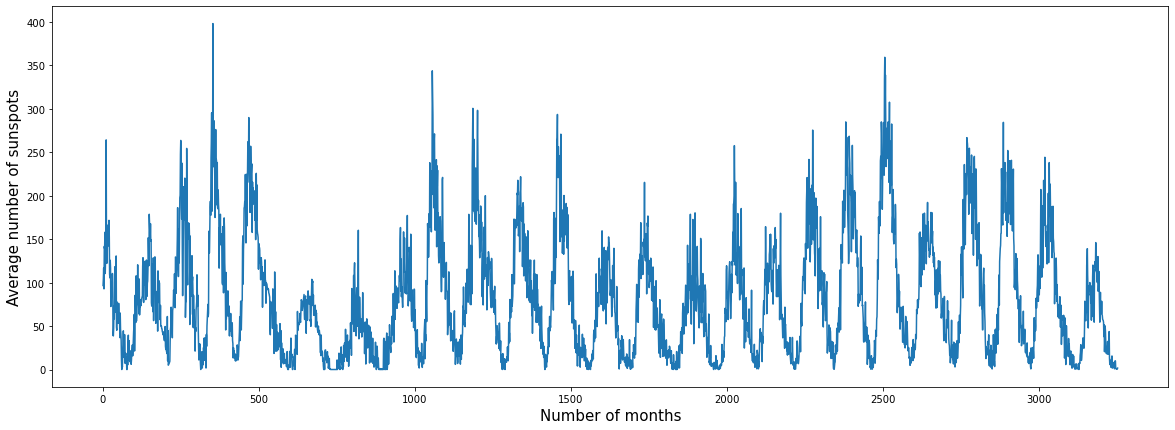

In [3]:
plt.rcParams['figure.figsize'] = [20,7]

X = df["Number of months"]
y = df[df.columns[-1]]
plt.plot(X,y)
plt.xlabel("Number of months", fontsize=15)
plt.ylabel("Average number of sunspots", fontsize=15)
plt.show()

In [4]:
maximas, _ = find_peaks(y,height=50,distance=80)

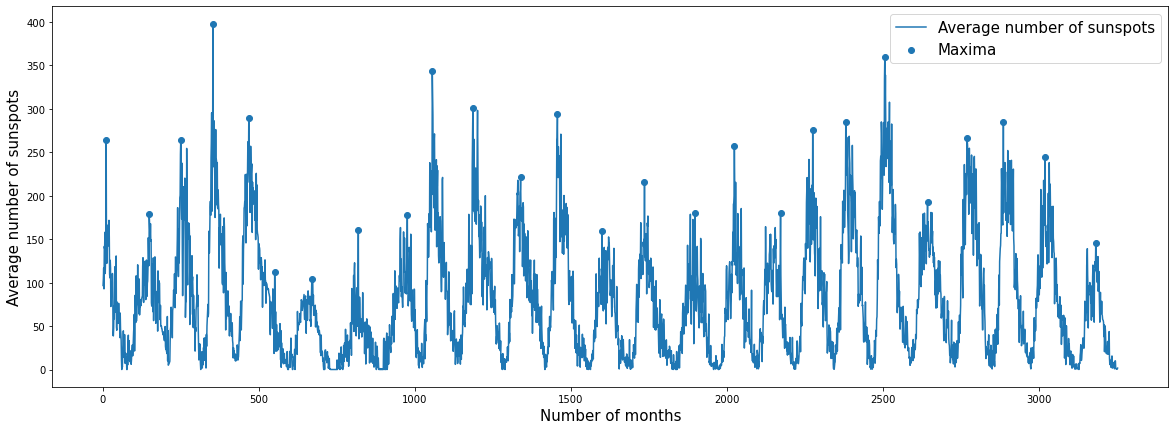

In [5]:
X = df["Number of months"]
y = df[df.columns[-1]]
plt.plot(X,y, label="Average number of sunspots")

max_x = maximas+1
max_y = df.loc[maximas][df.columns[-1]]
plt.scatter(max_x,max_y, label="Maxima")

plt.xlabel("Number of months", fontsize=15)
plt.ylabel("Average number of sunspots", fontsize=15)
plt.legend(fontsize=15)
plt.savefig("Sunspot_vs._months.png", dpi = 600)
plt.show()

In [9]:
max_sunspots = max_y.to_list()
print("Maxima values of the cycle"+"\n")
print(sorted(max_sunspots))
print("\n"+"Average number of sunspots near the maximas of the cycle = "+str(np.mean(max_sunspots)))
max_dict = dict(zip(max_y,max_x))

Maxima values of the cycle

[103.8, 112.3, 146.1, 159.6, 160.3, 177.3, 178.7, 179.9, 180.3, 192.3, 215.4, 221.9, 244.3, 257.7, 263.7, 264.3, 266.9, 275.6, 284.5, 285.0, 290.0, 293.6, 300.6, 343.8, 359.4, 398.2]

Average number of sunspots near the maximas of the cycle = 236.75


In [7]:
max_sunspots.sort()
print("Lowest 5 values of the peaks and their dates")
for i in max_sunspots[0:5]:
    filt = df['Number of months']==max_dict[i]
    print((df.loc[filt]["Date"]).to_string(index=False)+" --- "+str(i))

Lowest 5 values of the peaks and their dates
 1804-10-31 --- 103.8
 1794-11-30 --- 112.3
 2014-02-28 --- 146.1
 1882-04-30 --- 159.6
 1817-03-31 --- 160.3


In [8]:
print("Highest 5 values of the peaks and their dates")
for i in max_sunspots[-5:]:
    filt = df['Number of months']==max_dict[i]
    print((df.loc[filt]["Date"]).to_string(index=False)+" --- "+str(i))

Highest 5 values of the peaks and their dates
 1870-05-31 --- 293.6
 1847-10-31 --- 300.6
 1836-12-31 --- 343.8
 1957-10-31 --- 359.4
 1778-05-31 --- 398.2
